In [ ]:
#@title ## Big Data Lab  - Assignment 3  - Preparing and Exploratory Analysis of Data
#@markdown ### Instructions
#@markdown 1. The purpose of this assignment is to cover the necessary EDA skills 
#@markdown  you need to dominate in order to handle the course material.
#@markdown 2. You can choose to complete the assignment on your own or to colaborate with a partner. You are welcome to discuss your work with your fellow students but to maintain a healthy learning process - please keep all final answers to yourself! 
#@markdown 3. Complete the answers in the empty cells - Feel free to add as many extra cell as you require.
#@markdown 4. Fill in your name and select the Year and Department.
#@markdown 5. When done - Download the colab notebook by going to 'File -> Download .ipynb' and submit the file in the course's moodle page before the due date. 
 
#@markdown ---
#@markdown ### Enter your information:
Student1_Full_Name = "" #@param {type:"string"}
Student2_Full_Name = "" #@param {type:"string"}
Department = "Computer Science" #@param ["Select","Computer Science", "Industrial Engineering", "Economics and Management"]
Year = "Second" #@param ["Select","Second", "Third", "Fourth"]

#@markdown ---


1. Import the necessary libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data frame 
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

2. Create a dataframe from the following link. Name it "sales_df".
>'https://raw.githubusercontent.com/Turgibot/BigData/master/DataSets/supermarket_sales.csv'

In [ ]:
sales_df =  pd.read_csv('https://raw.githubusercontent.com/Turgibot/BigData/master/DataSets/supermarket_sales.csv')

##Know your data

Context

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

Attribute information

**Invoice id**: Computer generated sales slip invoice identification number

**Branch**: Branch of supercenter (3 branches are available identified by A, B and C).

**City**: Location of supercenters

**Customer type**: Type of customers, recorded by Members for customers using member card and Normal for without member card.

**Gender**: Gender type of customer

**Product line**: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

**Unit price**: Price of each product in $

**Quantity**: Number of products purchased by customer

**Tax**: 5% tax fee for customer buying

**Total**: Total price including tax

**Date**: Date of purchase (Record available from January 2019 to March 2019)

**Time**: Purchase time (10am to 9pm)

**Payment**: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

**COGS**: Cost of goods sold

**Gross margin percentage**: Gross margin percentage

Gross income: Gross income

**Rating**: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

Purpose

This dataset can be used for predictive data analytics purpose.

**For example:**

Given the type of customer, the date , and the branch - predict the rating that the customer would give. 

3. Print the head and info of the dataframe

In [ ]:
sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

4. What is the dataframe's shape?

In [ ]:
print('\nDataFrame Shape :', sales_df.shape)
print('\nNumber of rows :', sales_df.shape[0])
print('\nNumber of columns :', sales_df.shape[1])


DataFrame Shape : (1000, 17)

Number of rows : 1000

Number of columns : 17


5. What is the datatype of the 'Date' feature? convert it to datetime in the original dataframe

In [ ]:
sales_df['Date'].dtype

dtype('O')

In [ ]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])   

6. How much money ('cogs' sum of all invoices) do male vs female spend in each branch? Plot the results in a stacked bar graph.



In [ ]:
cogs = sales_df.groupby(by = ['Gender','Branch'])
cogs_sum = cogs.sum()
cogs_sum.reset_index(level = [0],inplace = True)
cogs_sum

,Gender,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Branch,,,,,,,,,
A,Female,9029.87,909,2536.6270,53269.1670,50732.54,766.666667,2536.6270,1101.1
B,Female,8775.24,911,2520.3950,52928.2950,50407.90,771.428571,2520.3950,1114.0
C,Female,9882.13,1049,2937.4030,61685.4630,58748.06,847.619048,2937.4030,1274.1
A,Male,9595.62,950,2520.5335,52931.2035,50410.67,852.380952,2520.5335,1288.1
B,Male,9703.64,909,2536.6370,53269.3770,50732.74,809.523810,2536.6370,1149.6
C,Male,8685.63,782,2327.7735,48883.2435,46555.47,714.285714,2327.7735,1045.8


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(name = 'Male', x=cogs_sum.index.values, y = cogs_sum.loc[cogs_sum['Gender']=='Male'].cogs, marker_color = 'yellow'))
fig.add_trace(go.Bar(name = 'Female', x=cogs_sum.index.values, y = cogs_sum.loc[cogs_sum['Gender']=='Female'].cogs, marker_color = 'pink'))
fig.update_layout(
    barmode = 'stack',
    title = 'Total cost of goods for male and female customers',
    yaxis_title = 'cost of goods',
    xaxis_title = 'Branch')
fig.show()

7. Plot a line graph that describes the daily total sum of all invoices (sum of the 'total' feature by date).

In [ ]:
pivot_sales_df = pd.pivot_table(data=sales_df,index=['Date'],values=['Quantity', 'Rating','Tax 5%','Total','Unit price','cogs','gross income','gross margin percentage'] , aggfunc=np.sum)
pivot_sales_df

,Quantity,Rating,Tax 5%,Total,Unit price,cogs,gross income,gross margin percentage
Date,,,,,,,,
2019-01-01,81,79.0,225.9610,4745.1810,659.95,4519.22,225.9610,57.142857
2019-01-02,48,48.4,92.6430,1945.5030,357.08,1852.86,92.6430,38.095238
2019-01-03,37,64.9,98.9585,2078.1285,475.66,1979.17,98.9585,38.095238
2019-01-04,32,39.1,77.3185,1623.6885,310.46,1546.37,77.3185,28.571429
2019-01-05,55,89.2,168.4135,3536.6835,739.64,3368.27,168.4135,57.142857
...,...,...,...,...,...,...,...,...
2019-03-26,52,86.1,93.4530,1962.5130,558.64,1869.06,93.4530,61.904762
2019-03-27,45,67.6,138.2295,2902.8195,568.41,2764.59,138.2295,47.619048
2019-03-28,48,70.5,106.1620,2229.4020,455.25,2123.24,106.1620,47.619048


In [ ]:
flattened = pd.DataFrame(pivot_sales_df.to_records())

In [ ]:
fig = go.Figure(data=go.Scatter(x=flattened['Date'], y=flattened['Total'], mode='markers+lines'))

fig.show()

8. What is the frequency of Payment type in each branch? Plot a pie chart for each payment type.

In [ ]:

pt=pd.pivot_table(data=sales_df,index=['Branch', 'Payment'] , values=['Total'], aggfunc='count')
t = pt.unstack().transpose()
t.reset_index(level=0, drop=True, inplace=True)
t

Branch,A,B,C
Payment,,,
Cash,110,110,124
Credit card,104,109,98
Ewallet,126,113,106


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7629dbedd8>,
      dtype=object)

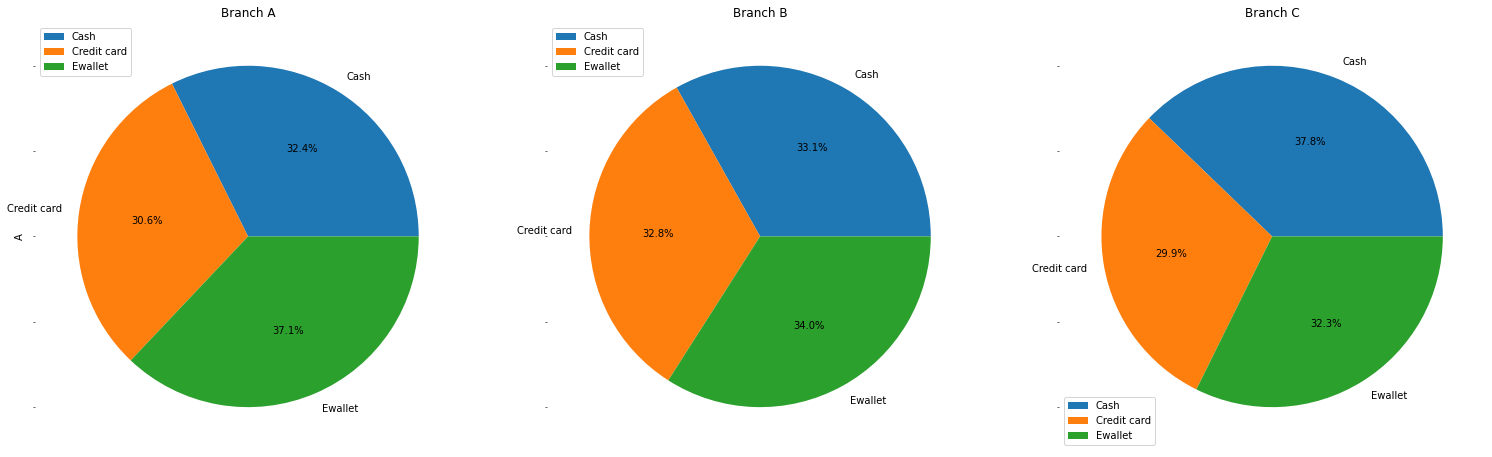

In [ ]:
t.plot.pie(subplots=True, figsize=(26, 16), autopct='%1.1f%%', legend=True,title=("Branch A","Branch B","Branch C" ),sharey=True)

9.Bin the 'rating' feature values into 3 categories and plot a grouped bar chart that shows the rating category frequency by the type of customer (side by side).


In [ ]:
#binning
#bins = sales_df['Cusomer type'].['Member','Noraml']
#labels = ['bad','good','excellent']
#heart_df['numbers of cases'] = pd.cut(x=heart_df.cholesterol, bins=bins, labels=labels)
#heart_df.head()

In [ ]:
#crosstab

In [ ]:

#fig = go.Figure()
#fig.add_trace(go.Bar(name = 'member', x= , y = , marker_color = 'pink'))
#fig.add_trace(go.Bar(name = 'normal', x= , y = , marker_color = 'blue'))
#fig.update_layout( 
    #barmode = 'group',
    #title = ' Frequecy of Number and Normal of different Rating categories',
    #yaxis_title = 'Number of cases',
    #xaxis_title = '')

In [ ]:
# trying2

#bins = ['bad', 'good', 'excellent']
#fig = go.Figure(data=[
 #   go.Bar(name='Member', x=sales_df['Rating'] , y=),
  #  go.Bar(name='Noraml', x=sales_df['Rating'] , y=[12, 18, 29])
#)

In [ ]:
bins = [1,5,8,10]
labels = ['bad','good','excellent']
sales_df['Rating_bins'] = pd.cut(x=sales_df.Rating, bins=bins, labels=labels)
bins_df = pd.crosstab(index=sales_df['Rating_bins'], columns=sales_df['Customer type'])
print (bins_df)

Customer type  Member  Normal
Rating_bins                  
bad                98      76
good              246     272
excellent         157     151


In [ ]:
#fig = go.Figure()
#fig.add_trace(go.Bar(name='Member', x=bins_df.index.['Rating_bins'], y= bins_df['Rating_bins'].['Member'], marker_color='lightsalmon'))
#fig.add_trace(go.Bar(name='Noraml', x=bins_df.index.['Rating_bins'], y= bins_df['Rating_bins'].['Normal'], marker_color='yellow'))
#fig.update_layout(
    #barmode='group',
   # title='Frequecy of Member and Normal of different Rating categories', 
  #  yaxis_title='Number of cases')
#fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(name='Member', x=bins_df.index, y=bins_df.iloc[:,0], marker_color='lightsalmon'))
fig.add_trace(go.Bar(name='Normal', x=bins_df.index, y=bins_df.iloc[:,1], marker_color='blue'))
fig.update_layout(
    barmode='group',
    title='Frequency of Member and Normal of different Rating categories', 
    yaxis_title='Number of cases')
fig.show()

10. a. Are there any zero variance features in the DF? Drop the columns from the DF if such exist.

In [ ]:
sales_df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
Rating_bins                   3
dtype: int64

10. b. Are there any unecessary features in the DF? (That don't add new information) Drop the columns from the DF if such exist.

In [ ]:
sales_df.drop('gross margin percentage', axis=1, inplace=True)

10. c. Print a correlation matrix, afterwards plot a heatmap of the correlation matrix. 

In [ ]:
temp1_df = sales_df.corr()
temp1_df

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


In [ ]:
fig = go.Figure(data=go.Heatmap(
                   z=sales_df.corr(),
                   x=temp1_df.columns,
                   y=temp1_df.columns,
                   hoverongaps = False))
fig.update_layout(
    width=750
)
fig.show()

10. b. Detect the highly correlated features. Drop them and plot the updated correlation heatmap.

(Make sure not to delete all the features - Keep one of each correlated group) 

In [ ]:

fig.show()

11. Scale all the numeric date using SKLearn standardization module.

12. Plot and print the outliers in the scaled Total feature( or the other feature you decided not to drop in question 10 ). 


In [ ]:

outliers

In [ ]:

fig.show()